In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
cd /content/gdrive/My Drive/Untitled folder/wav

/content/gdrive/My Drive/Untitled folder/wav


#### Importăm modulele necesare:

In [3]:
import signal_processing, data_load, learn, evaluate, render

Using TensorFlow backend.


In [4]:
num_rows = 128
num_columns = 128
num_channels = 3

num_epochs = 100
num_batch_size = 13
num_speakers = 10
num_seconds = 2.9
fine_tune_at = 300
base_lr = 0.0001

In [25]:
featuresdf = data_load.make_dataframe_class_no(num_speakers, './', num_rows, num_columns, num_seconds)

Finished feature extraction from  970  files


In [26]:
result_sets = data_load.make_train_test_sets(featuresdf, num_rows, num_columns, num_channels)
num_labels = result_sets[4]

#### Descărcăm modelul DenseNet 121:

In [27]:
base_model = learn.get_densenet(num_rows, num_columns, num_channels, num_labels, fine_tune_at)

Number of layers in the base model:  428
Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d_4 (ZeroPadding2D (None, 134, 134, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 64, 64, 64)   9408        zero_padding2d_4[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1/conv[0][0]                 
_______________________________________________

In [28]:
model = learn.build_model_densenet(base_model, num_labels)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 1024)              7037504   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10250     
Total params: 7,047,754
Trainable params: 2,899,658
Non-trainable params: 4,148,096
_________________________________________________________________


In [29]:
learn.compile_model_pretrained_net(model, base_lr)

In [31]:
evaluate.evaluate_before_training(model, result_sets[0], result_sets[2]) 

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 1024)              7037504   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                10250     
Total params: 7,047,754
Trainable params: 2,899,658
Non-trainable params: 4,148,096
_________________________________________________________________
25/25 [==============================] - 33s 1s/step - loss: 20.5028 - accuracy: 0.0915
Pre-training accuracy: 9.1495%


#### Antrenăm modelul:

In [33]:
class_weight = learn.calculate_class_weight(featuresdf)
history = learn.train_model_class_weights(model, result_sets, num_epochs, num_batch_size, 'DenseNet1', 'default', 'DenseNet1', class_weight=class_weight)

Epoch 1/100
60/60 [==============================] - ETA: 0s - loss: 9.6930 - accuracy: 0.3827
Epoch 00001: val_loss improved from inf to 2.12604, saving model to saved_models/weights.best.DenseNet1.hdf5
60/60 [==============================] - 60s 993ms/step - loss: 9.6930 - accuracy: 0.3827 - val_loss: 2.1260 - val_accuracy: 0.2371
Epoch 2/100
60/60 [==============================] - ETA: 0s - loss: 6.3698 - accuracy: 0.5851
Epoch 00002: val_loss improved from 2.12604 to 1.86924, saving model to saved_models/weights.best.DenseNet1.hdf5
60/60 [==============================] - 59s 981ms/step - loss: 6.3698 - accuracy: 0.5851 - val_loss: 1.8692 - val_accuracy: 0.2835
Epoch 3/100
60/60 [==============================] - ETA: 0s - loss: 5.0052 - accuracy: 0.6765
Epoch 00003: val_loss improved from 1.86924 to 1.39859, saving model to saved_models/weights.best.DenseNet1.hdf5
60/60 [==============================] - 59s 988ms/step - loss: 5.0052 - accuracy: 0.6765 - val_loss: 1.3986 - val_a

In [34]:
evaluate.evaluate_model(model, 'DenseNet1', result_sets)

Training Accuracy:  1.0
Testing Accuracy:  0.8298969268798828


In [35]:
evaluate.display_metrics(model, 'DenseNet1', result_sets)

              precision    recall  f1-score   support

           0       0.78      0.88      0.82        16
           1       0.82      1.00      0.90        18
           2       0.97      0.88      0.93        43
           3       0.64      0.80      0.71        20
           4       0.64      0.54      0.58        13
           5       0.94      0.97      0.95        30
           6       0.71      0.86      0.77        14
           7       1.00      0.94      0.97        16
           8       1.00      0.58      0.74        12
           9       0.56      0.42      0.48        12

    accuracy                           0.83       194
   macro avg       0.80      0.79      0.79       194
weighted avg       0.84      0.83      0.83       194

Confusion matrix: 
[[14  0  0  1  0  0  0  0  0  1]
 [ 0 18  0  0  0  0  0  0  0  0]
 [ 1  1 38  1  1  0  1  0  0  0]
 [ 0  1  0 16  2  0  1  0  0  0]
 [ 2  0  0  1  7  0  1  0  0  2]
 [ 0  0  0  0  0 29  1  0  0  0]
 [ 0  0  0  1  1  0 12  

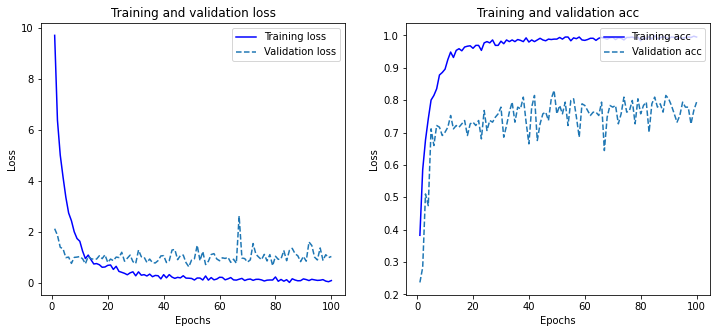

In [36]:
evaluate.plot_history(history)